# Individual project 

In this project, I will be creating some classification models to predict the outcome for animals at a rescue/hospital facility. The data is acquired from data.world.

### Overview:

The data for this project contains basic information about the animals, such as age, name, breed etc... The target variable for the project will be the outcome for the animal, or what happened to the animal. After cleaning the data, I can explore it to find useful information for modeling. In the modeling phase, I will try to create the best possible model to predict the outcome for the animal.

### Goals:

* Acquire data
* Prepare data for exploration
* Explore data and analyze findings
* Preprocess data for modeling
* Create models
* Analze model results
* Create a conclusion

## Imports

First, these are the imports required for this project.

## Data acquisition

In [1]:
# Important data science libraries
import pandas as pd
import numpy as np

# Useful visual libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Useful functions for the project
import evaluate as ev
import prepare as prep
import acquire as ac

#For stats testing.
from scipy import stats


# importing machine learning libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

# set seed number to be used for all random states so my results can be duplicated
seed=100

For this project data acquisiton was very simple and only involved downloading a .csv file. The link to the file is in the readme.md file. Here is a brief preview of the data before any cleaning was done.

In [2]:
pd.read_csv('AustinAnimalWorld.csv').head()  # Read unedited .csv file

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A798981,NaN,07/06/2019 07:21:00 PM,07/06/2019 07:21:00 PM,01/02/2019,Adoption,NaN,Dog,Neutered Male,6 months,Airedale Terrier,Brown/White
1,A792935,Tyler,07/06/2019 07:19:00 PM,07/06/2019 07:19:00 PM,04/17/2017,Adoption,NaN,Dog,Neutered Male,2 years,Pit Bull Mix,Tan
2,A798879,*Ron,07/06/2019 06:52:00 PM,07/06/2019 06:52:00 PM,02/14/2019,Adoption,NaN,Dog,Neutered Male,4 months,Labrador Retriever,Sable
3,A799278,NaN,07/06/2019 06:38:00 PM,07/06/2019 06:38:00 PM,06/29/2019,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Brown Tabby/White
4,A799275,NaN,07/06/2019 06:37:00 PM,07/06/2019 06:37:00 PM,06/29/2019,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Black/White


## Data Preparation

Preparation involved a lot of data cleaning. A lot of the data was split into multiple columns so it would make more sense. Many columns were dropped because they contained repetitive information or useless information. Nulls were filled accordingly depending on the context of each column. A lot of the data was binned due to the extremely high number of unique values in some columns.

In [3]:
a = ac.animals()  # Acquire clean data
a.head()

,name,outcome_type,animal_type,age,gender,neut_spay,condition,breed1,breed2
0,False,Adoption,Dog,180,male,True,Normal,Other,purebred
1,True,Adoption,Dog,730,male,True,Normal,Pit Bull,mix
2,True,Adoption,Dog,120,male,True,Normal,Labrador Retriever,purebred
3,False,Transfer,Cat,28,unk,False,Normal,Domestic Shorthair,mix
4,False,Transfer,Cat,28,unk,False,Normal,Domestic Shorthair,mix


All of the rows were kept, no values were dropped.

## Data Exploration

Before beggining exploration, we must split data.

In [4]:
a, val, test = prep.train_val_test(a, 'outcome_type', stratify=True)  # Split data. Stratify by outcome

(72426, 9) (15520, 9) (15521, 9)


### How does the age of an animal impact the outcome of that animal?

To plot this. Animal ages were split between < 1 year old and > 1 year old for easier visualization.

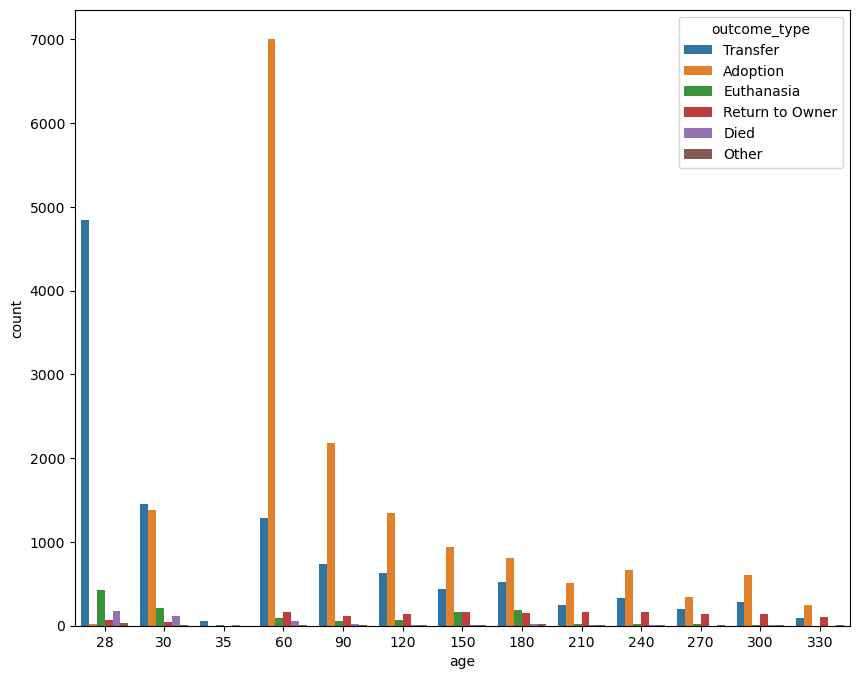

In [5]:
# Create a plot
plt.figure(figsize=(10,8))
sns.countplot(a[a.age < 365], x='age', hue='outcome_type')
plt.show()

Animals less than a month old are almost always transferred. These are possibly animals born on the facility or too young for adoption. Animals at 2 months or more are the most commonly adopted.

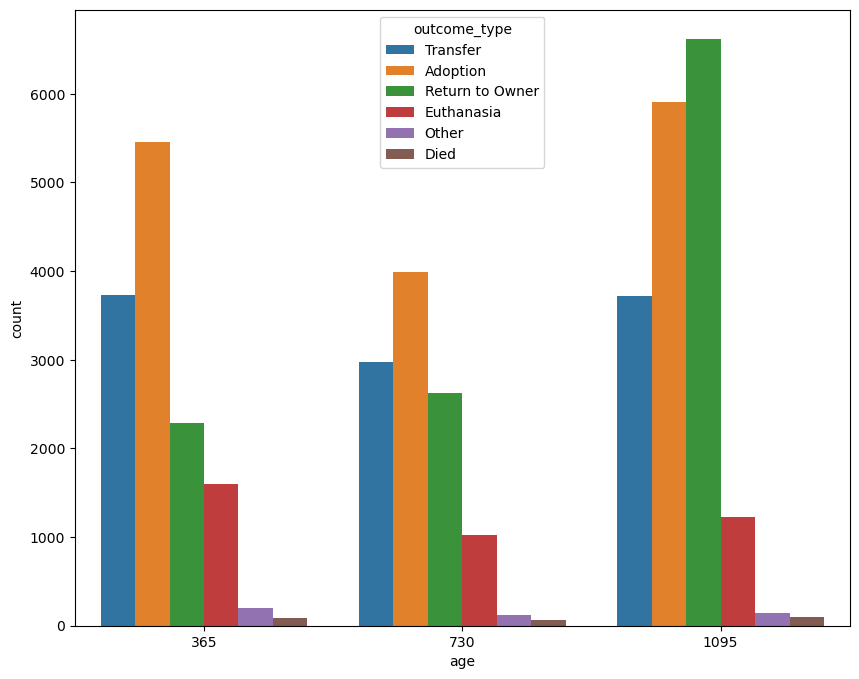

In [6]:
# Create plot
plt.figure(figsize=(10,8))
sns.countplot(a[a.age > 360], x='age', hue='outcome_type')
plt.show()

For animals 1+ years old we can see that they are adopted less often. It is more common that they are returned to their owner the older they are. 

I will create a barplot to see the average age of each group.

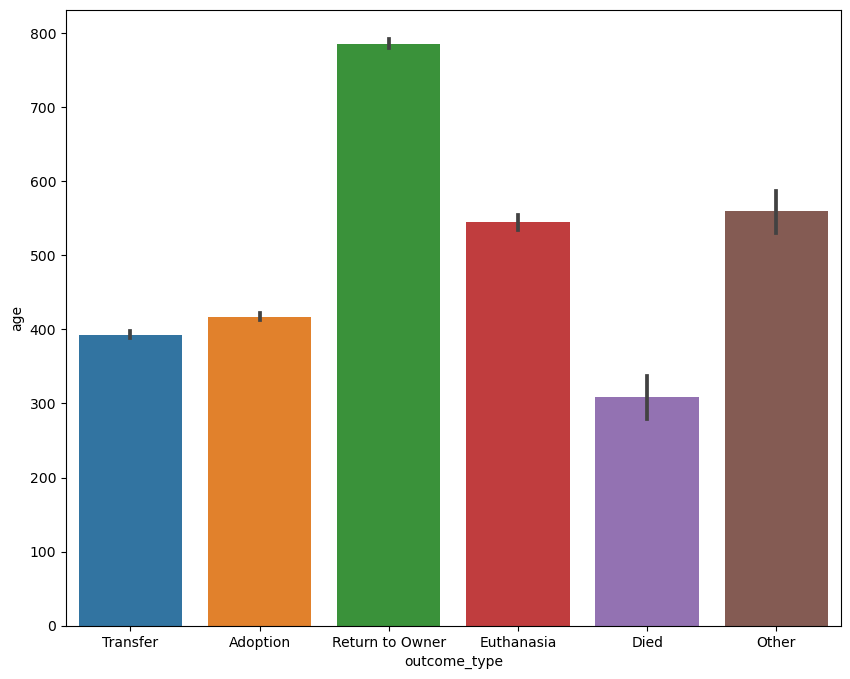

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(a, x='outcome_type', y='age')
plt.show()

In [8]:
return_age = a[a.outcome_type == 'Return to Owner'].age  # Sample of returned animals
avg = a.age.mean()

In [9]:
t, p = stats.ttest_1samp(return_age, avg)  # Performing statistics test. One-sample, One-tail, T-test
ev.check_ttest(t, p, tails=1)  # Evaluate test results using function in evaluate.py

There is a signifcant result. P-value was 0.0.
T-value was greater than 0. With a value of 97.2.


The stats test indicated that there is a statistically significant result and the average return age is significantly higher than the average age.

### Does the animal type have an affect on outcome?

To check this I will separate animals into groups and then create subplots to check the outcomes.

In [10]:
# Create categories
bird = a[a.animal_type == 'Bird']
dog = a[a.animal_type == 'Dog']
cat = a[a.animal_type == 'Cat']
other = a[a.animal_type == 'Other']

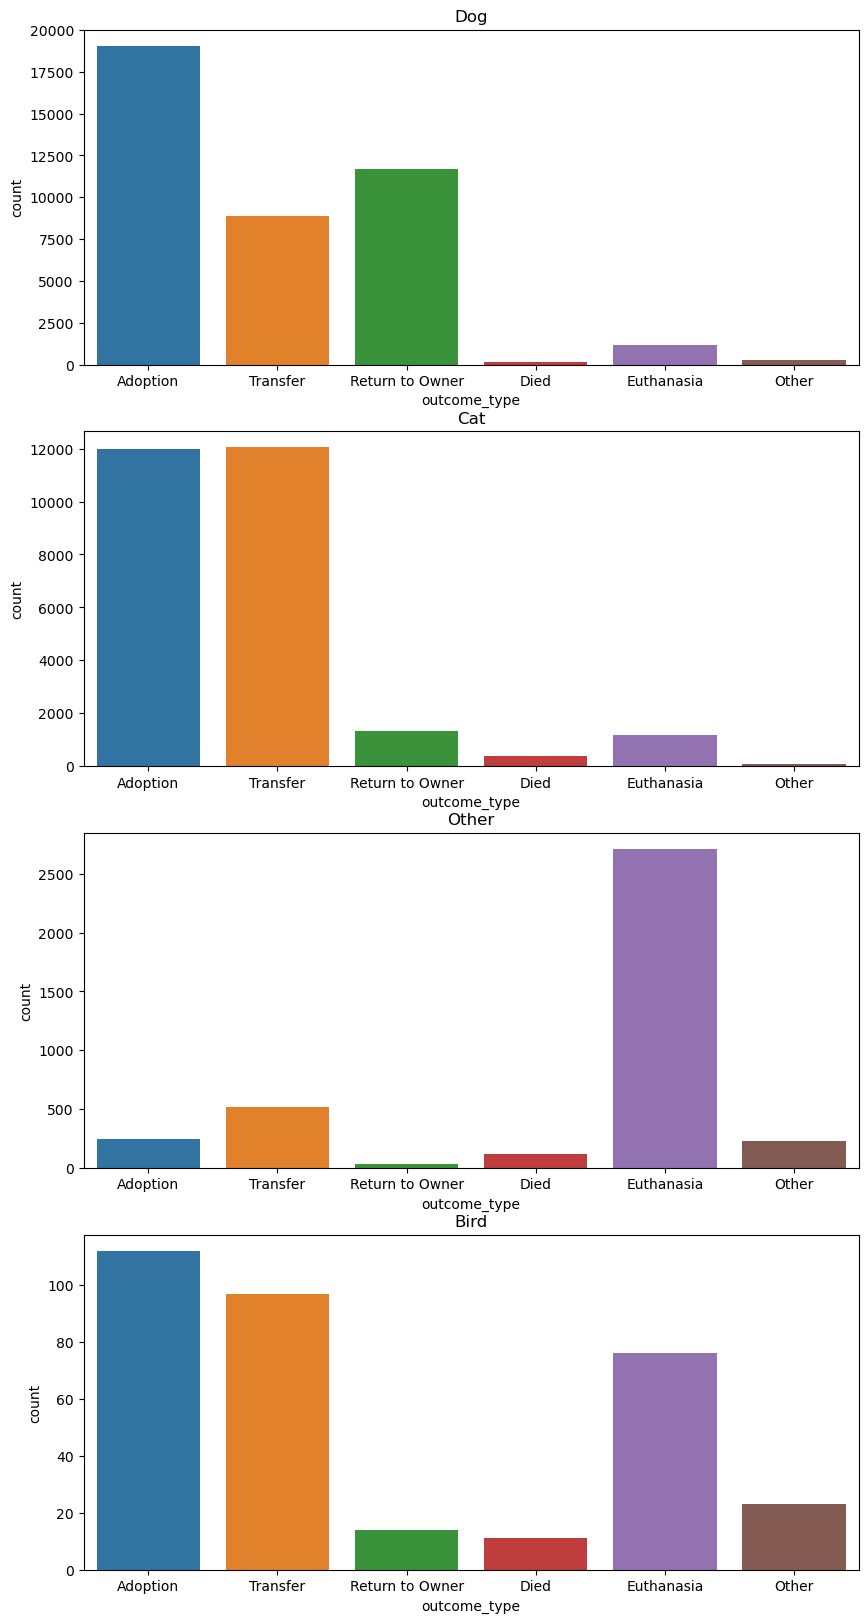

In [11]:
# Plot side by side outcomes for each group
orders=['Adoption', 'Transfer', 'Return to Owner', 'Died', 'Euthanasia','Other']
fig, axes = plt.subplots(4, 1, figsize=(10, 20))  # Create subplots
sns.countplot(data=dog, x='outcome_type', ax=axes[0], order=orders)
sns.countplot(data=cat, x='outcome_type', ax=axes[1], order=orders)
sns.countplot(data=other, x='outcome_type', ax=axes[2], order=orders)
sns.countplot(data=bird, x='outcome_type', ax=axes[3], order=orders)
axes[0].title.set_text('Dog')
axes[1].title.set_text('Cat')
axes[2].title.set_text('Other')
axes[3].title.set_text('Bird')
plt.show()

NOTE: PAY ATTENTION TO THE Y-AXIS SCALE.

Based on this graph it is very clear that there are differences between species. Bird and other animals are much more likely to be euthanized, and dogs are more likely to be returned to owner than cats. 

### Does gender influence the outcome?

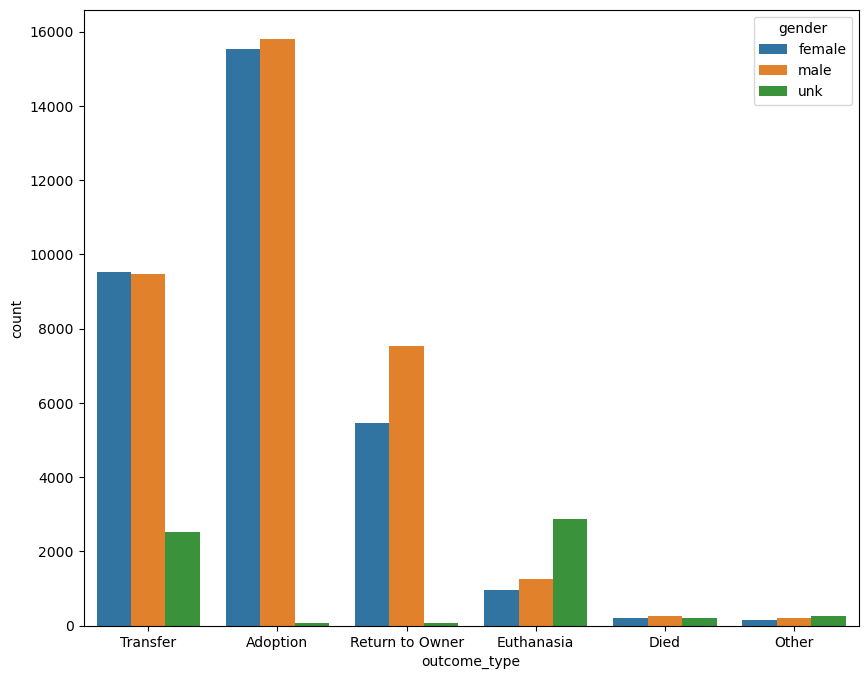

In [12]:
# Create plot
plt.figure(figsize=(10,8))
sns.countplot(a, x='outcome_type', hue='gender')
plt.show()

From this visual, we can see that male or female gender does not differ much but an unknown gender has a huge infleunce on outcome. Animals of unknown gender are almost never adopted and they are euthanized far more often.

In [13]:
# Isolate the two groups
temp = a[(a.outcome_type == 'Adoption') | (a.outcome_type == 'Euthanasia')]

In [14]:
# Create crosstab to visualize
ct = pd.crosstab(temp.outcome_type, temp.gender)
ct

gender,female,male,unk
outcome_type,,,
Adoption,15540,15800,77
Euthanasia,967,1254,2886


In [15]:
chi, p, degf, expected = stats.chi2_contingency(ct)
pd.DataFrame(expected)

,0,1,2
0,14198.894398,14669.409648,2548.695953
1,2308.105602,2384.590352,414.304047


In [16]:
ev.eval_p(p)

There is a signifcant result. P-value was 0.0.


From performing a statistics test, we can see that there is indeed a significant result and dogs of unkown gender are adopted far less and euthanized far more.

### Does having a name impact the outcome of an animal?

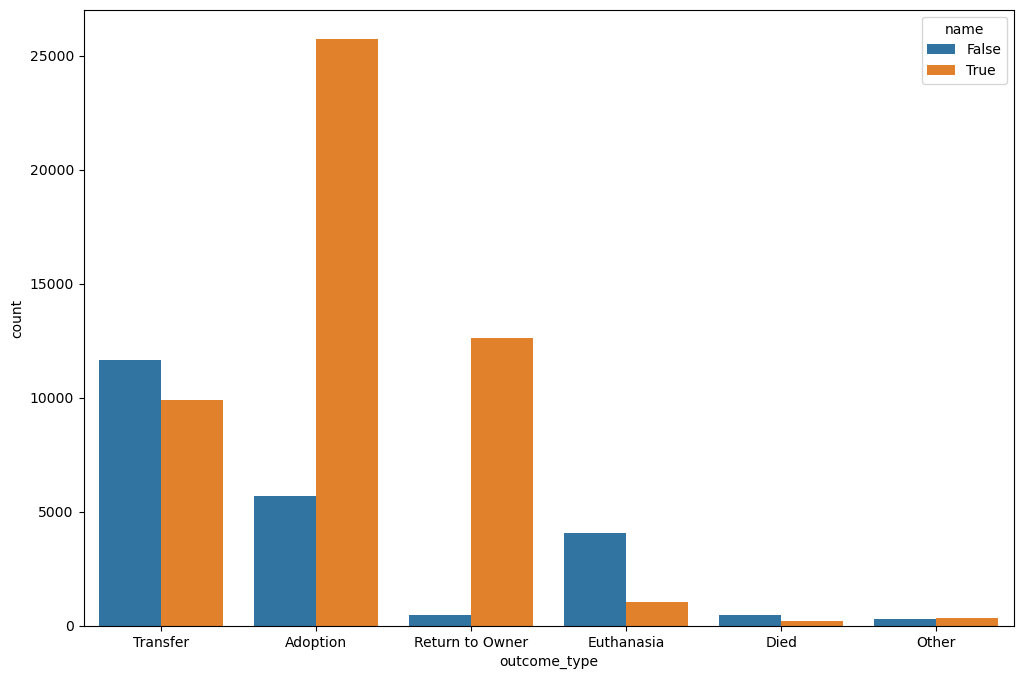

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(a, x='outcome_type', hue='name')
plt.show()

From this countplot it does seem that name has a very strong correlation with the outcome. Animals with names are returned to their owner, and adopted far more than those with no names. Animals with names are euthanized far less than nameless ones.

### Key Findings:

There are numerous features that influence the outcome of an animal.

* Animals with no name, or unknown gender are much more likely to be euthanized and way less likely to be adopted
* Birds and 'other' animals are far more likely to be euthanized
* Very young animals, are almost always transfered to another facility. They are likely born on site
* Animals between 2 months - 3 years are the most the commonly adopted
* Older animals are more likely to be returned to their owners

Different breeds seemed to have different outcomes rates, however it was very difficult to come up with a clear observable relationship between breed and outcome since there are so many breeds.

## Modeling

For the modeling section. I will separate the data into 4 groups for each animal type. This created more accurate models since some features values were exclusive to some of the animal types. 

In [18]:
# Create df using function
a = ac.animals()

In [19]:
# Create 4 groups
bird = a[a.animal_type == 'Bird']
dog = a[a.animal_type == 'Dog']
cat = a[a.animal_type == 'Cat']
other = a[a.animal_type == 'Other']

### Dogs

In [20]:
train, val, test, x_train, y_train, x_val, y_val, x_test, y_test = prep.preprocess(dog)

(41300, 9) (8850, 9) (8850, 9)


#### Baseline

First, I will create a baseline model.

In [21]:
# Use function to create a baseline model and evaluate resutls
res = ev.baseline_classification(train, 'outcome_type', 'Adoption')

Baseline accuracy is: 46.31%.
Baseline recall is: 100.0%.
Baseline precision is: 46.31%.



The baseline model for dogs has 46% accuracy.

#### Best Model

In [22]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.fit_transform(y_val)
y_test_encoded = le.fit_transform(y_test)

# Create model and test it
xgb = XGBClassifier()
ev.train_model(xgb, x_train, y_train_encoded, x_val, y_val_encoded, x_test, y_test_encoded, test=True)
preds = xgb.predict(x_test)

0.6516222760290556
0.6409039548022599
0.6291525423728813


The best models for dogs can classify the outcome with around 63% accuracy.

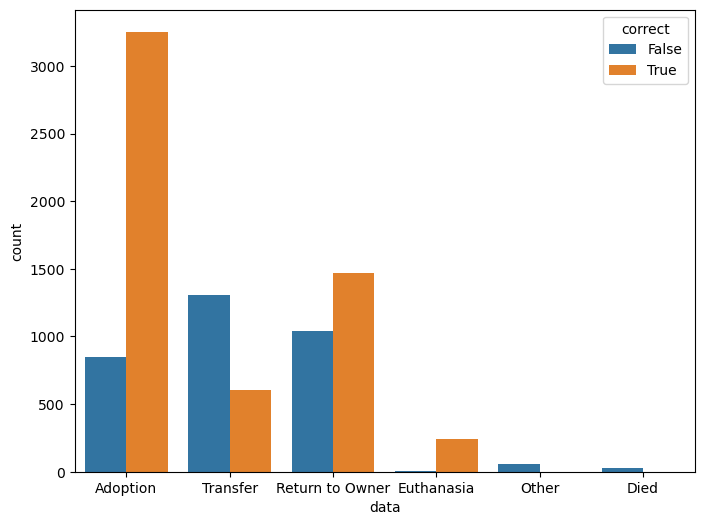

In [23]:
# Create dataframe of results
results =  pd.DataFrame({'data':y_test,
                         'predictions':le.inverse_transform(preds)})

# Create column of correct and incorrect guesses
results['correct'] = results.data == results.predictions

plt.figure(figsize=(8,6))
sns.countplot(results, x='data', hue='correct')
plt.show()

Here is the visualized permance of the dog model.

### Cats

Calculate baseline first.

#### Baseline

In [24]:
# Use function to split all data for modeling.
train, val, test, x_train, y_train, x_val, y_val, x_test, y_test = prep.preprocess(cat)

(26964, 9) (5778, 9) (5778, 9)


In [25]:
# Use function to create a baseline model and evaluate resutls
res = ev.baseline_classification(train, 'outcome_type', 'Adoption')

Baseline accuracy is: 44.64%.
Baseline recall is: 0.0%.
Baseline precision is: 0.0%.



The baseline model has an accuracy of around 45%.

#### Best model

The cat models all performed about the same. Below is the best model and a visual of how it performed.

In [26]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
ev.train_model(clf, x_train, y_train, x_val, y_val, x_test, y_test, test=True)
preds = clf.predict(x_test)

0.8204272363150867
0.8177570093457944
0.8175839390792662


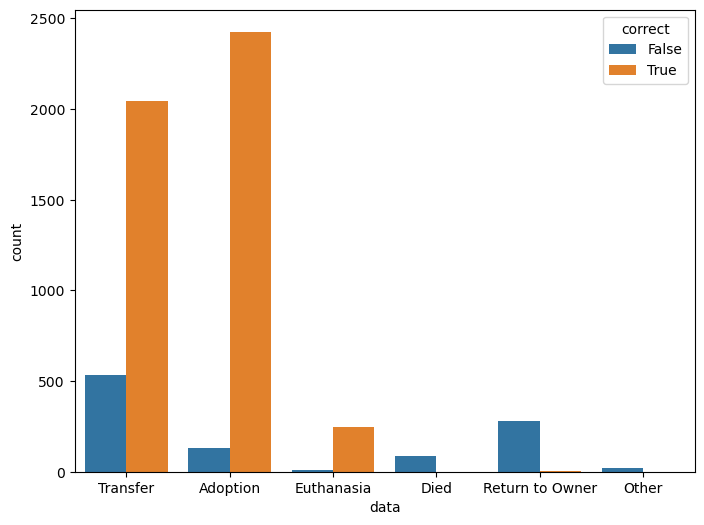

In [27]:
# Create dataframe of results
results =  pd.DataFrame({'data':y_test,
                         'predictions':preds})

# Create column of correct and incorrect guesses
results['correct'] = results.data == results.predictions

plt.figure(figsize=(8,6))
sns.countplot(results, x='data', hue='correct')
plt.show()

The cat model did excellent on predicting transfer, adoption and euthanasia

### Birds

Due to the low amount of values of bird data, results may not be as consistent if new data is introduced.

#### Baseline

In [28]:
# Use function to split all data for modeling.
train, val, test, x_train, y_train, x_val, y_val, x_test, y_test = prep.preprocess(bird)

(334, 9) (72, 9) (72, 9)


In [29]:
# Use function to create a baseline model and evaluate resutls
res = ev.baseline_classification(train, 'outcome_type', 'Adoption')

Baseline accuracy is: 36.83%.
Baseline recall is: 100.0%.
Baseline precision is: 36.83%.



#### Best model

The bird model easily cleared the baseline but still struggled when compared to other models

In [30]:
rf1 = RandomForestClassifier(max_depth=5, random_state=seed)
ev.train_model(rf1, x_train, y_train, x_val, y_val, x_test, y_test, test=True)
preds = rf1.predict(x_test)

0.6706586826347305
0.5833333333333334
0.5972222222222222


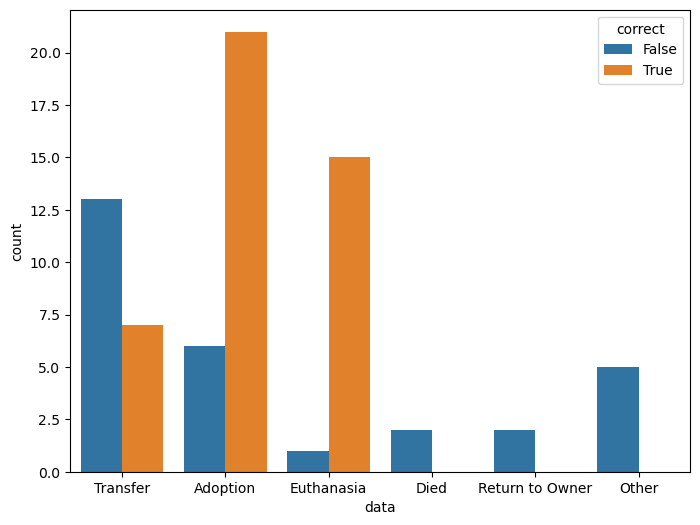

In [31]:
# Create dataframe of results
results =  pd.DataFrame({'data':y_test,
                         'predictions':preds})

# Create column of correct and incorrect guesses
results['correct'] = results.data == results.predictions

plt.figure(figsize=(8,6))
sns.countplot(results, x='data', hue='correct')
plt.show()

It only did well predicting adoption and euthanasia, it performed poorly otherwise.

### Other

The final model is for other animals

#### Baseline

In [32]:
# Use function to split all data for modeling.
train, val, test, x_train, y_train, x_val, y_val, x_test, y_test = prep.preprocess(other)

(3828, 9) (820, 9) (821, 9)


In [33]:
# Use function to create a baseline model and evaluate resutls
res = ev.baseline_classification(train, 'outcome_type', 'Adoption')

Baseline accuracy is: 70.45%.
Baseline recall is: 0.0%.
Baseline precision is: 0.0%.



#### Best model

The model for other animals did really well. The majority of animals were euthanized so the baseline was already high.

In [34]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.fit_transform(y_val)
y_test_encoded = le.fit_transform(y_test)

# Create model and test it
xgb = XGBClassifier()
ev.train_model(xgb, x_train, y_train_encoded, x_val, y_val_encoded, x_test, y_test_encoded, test=True)
preds = xgb.predict(x_test)

0.9109195402298851
0.8890243902439025
0.8855054811205847


Below is a visualization of the resutls

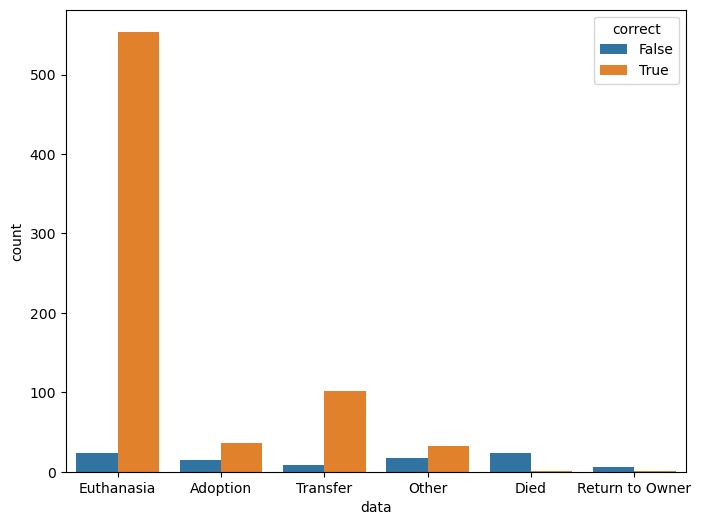

In [35]:
# Create dataframe of results
results =  pd.DataFrame({'data':y_test,
                         'predictions':le.inverse_transform(preds)})

# Create column of correct and incorrect guesses
results['correct'] = results.data == results.predictions

# Plot Results
plt.figure(figsize=(8,6))
sns.countplot(results, x='data', hue='correct')
plt.show()

The model for other animals performed very very well with high accuracy in almost all outcomes.

## Conclusions

1. Animals with no name are less likely to be adopted or returned to their owner. They most likely do not have owners.
0. Animals of unknown gender are way more likely to be euthanized or transfered than adopted.
0. Animals between 0-2 years old are adopted at much higher rates than older ones.
0. 'Other' animals are euthanized at way higher rates. This is likely because they are wild animals.
0. Older animals are more likely to be returned to their owners

Next time, given more time. I would like to explore data more and prepare it differently. I would also like more time test different hyperparameters on models. The models created do perform much better than the baseline. It is hard to draw a clear conclusion on how each breed of animal impacts their outcome, but from looking at the visuals it is clear that different breeds do have different outcomes. I would also next time create a simpler mvp and then improve upon that to create a better model.